<a href="https://colab.research.google.com/github/Taaneeshq/asg5/blob/main/parameter_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data'
columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar',
           'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
df = pd.read_csv(url, names=columns)


In [ ]:
X = df.drop('letter', axis=1)
y = LabelEncoder().fit_transform(df['letter'])

In [ ]:
results = []
best_accuracies = []

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import numpy as np

results = []
best_accuracies = []

cv = StratifiedKFold(n_splits=3, shuffle=True)

for i in tqdm(range(10), desc="Processing 10 samples"):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    params = {
        'C': np.logspace(-3, 3, 15),  # More refined from 0.001 to 1000
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4]  # only used for 'poly' kernel
    }

    clf = RandomizedSearchCV(
        SVC(probability=True),
        param_distributions=params,
        n_iter=40,
        scoring='accuracy',
        verbose=0,
        n_jobs=-1,
        cv=cv,
        random_state=i
    )
    clf.fit(X_train, y_train)

    best_model = clf.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results.append({
        'Sample': f'S{i+1}',
        'Best Accuracy': acc,
        'Best Parameters': clf.best_params_
    })

    best_accuracies.append(clf.cv_results_['mean_test_score'])


Processing 10 samples:   0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
table = pd.DataFrame(results)
print(table)

  Sample  Best Accuracy                               Best Parameters
0     S1          96.73  {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
1     S2          91.68   {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
2     S3          96.32  {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
3     S4          96.17  {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
4     S5          95.92  {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
5     S6          96.08  {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
6     S7          95.82  {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
7     S8          96.40  {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
8     S9          96.52  {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
9    S10          96.35  {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


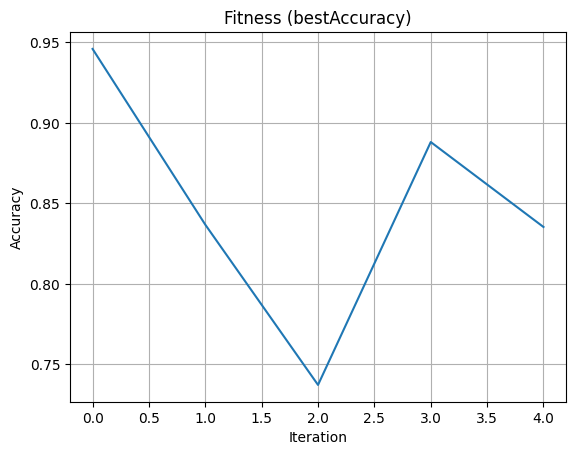

In [ ]:
best_index = table['Best Accuracy'].idxmax()
plt.plot(best_accuracies[best_index])
plt.title('Fitness (bestAccuracy)')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()